In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import pandas as pd
import numpy as np

#pd.set_option('display.max_rows', None)

## Cleaning Text Data and Creating DataFrame


In [2]:
#access label information from text file
#open file as text object

text_object = open(r'words.txt')

In [3]:
#read the contents of text object

words_text_1 = text_object.readlines()

In [4]:
#slice unwanted headers from text object

words_text = words_text_1[18:]

In [5]:
#preview the results of new list

writing_test = words_text[:100]

In [6]:
#split each section into comma seperated values

comma_sep = []

for x in words_text: 
    comma_sep.append(x.split())
    

In [7]:
#check the results of the split, by checking length and previewing values

print('number of image files is:', len(comma_sep,))

print('\n','first entry:', comma_sep[1],'\n','\n','last entry:', comma_sep[-1])

number of image files is: 115302

 first entry: ['a01-000u-02-06', 'ok', '157', '1544', '1115', '339', '96', 'NN', 'meeting'] 
 
 last entry: ['r06-143-04-10', 'ok', '186', '1892', '1453', '36', '66', '?', '?']


## Constructing text_to_df function
 - It was necessary to develop this function as words.txt contains inconsistent shapes

In [9]:
#create new lists to hold each desired value
images = []
status_code = []
targets = []
#iterate through list of comma seperated values and select each via index
for target in comma_sep:
    images.append(target[0])
    status_code.append(target[1])
    targets.append(target[-1])

In [11]:
#convert lists to pandas series
img_series = pd.Series(images)
target_series = pd.Series(targets)
status_series = pd.Series(status_code)

In [12]:
#convert series to dataframe objects
img_df = pd.DataFrame(img_series)
target_df = pd.DataFrame(target_series)
status_df = pd.DataFrame(status_series)

In [13]:
#merge dataframe objects into one main df

df_1 = img_df.merge(status_df, left_index=True, right_index=True)

df = df_1.merge(target_df, left_index = True, right_index = True)

In [14]:
#preview df and rename columns
df.head(2)

,0_x,0_y,0
0,a01-000u-02-05,ok,a
1,a01-000u-02-06,ok,meeting


In [15]:
df.rename(columns={'0_x': 'image', '0_y':'status_code', 0 : 'target'}, inplace=True)

In [28]:
df.head(2)

,image,status_code,target
0,a01-000u-02-05.png,ok,a
1,a01-000u-02-06.png,ok,meeting


### Wrapping everything in one function for desired conversion from text file to dataframe

In [18]:
def text_to_df(text_file):
    
    """Function receives text file(string) as input,
    selects image.png name, status code, and target name.
    Returns a pandas DataFrame object"""
    
    text_object = open(text_file)
    
    words_text_1 = text_object.readlines()
    
    #slice unwanted headers from text object
    words_text = words_text_1[18:]
    
    #split text values into comma separated values
    comma_separated = []
    for x in words_text: 
        comma_separated.append(x.split())
    
    #grab desired values from their indices in the split list
    images = []
    targets = []
    status_codes = []

    for target in comma_separated:
        images.append(target[0])
        status_code.append(target[1])
        targets.append(target[-1])
    
    #turn lists into series
    img_series = pd.Series(images)
    status_series = pd.Series(status_code)
    target_series = pd.Series(targets)
    
    #turn lists into dataframes
    img_df = pd.DataFrame(img_series)
    status_df = pd.DataFrame(status_series)
    target_df = pd.DataFrame(target_series)
  
    
    #merge dataframes 
    df_1 = img_df.merge(status_df, left_index=True, right_index=True)
    df = df_1.merge(target_df, left_index = True, right_index = True)
    
    #rename columns
    df.rename(columns={'0_x': 'image', '0_y':'status_code', 0 : 'target'}, inplace=True)
    
    return df

In [19]:
#preview function
text_df = text_to_df('words.txt')

In [20]:
text_df.shape

(115302, 3)

### Identify image files with known errors marked as 'err'

In [21]:
#create df object for known error image files
status_err = df[df['status_code'] == 'err']

In [23]:
status_err.shape


(18864, 3)

In [24]:
#remove image files with known error val
df.drop(status_err.index, inplace=True)

In [26]:
#inspect shape of new df
df.shape

(96438, 3)

In [27]:
#append .png to file names
df['image'] = df['image'].astype(str) + '.png'

### Create new dataframe of unique word counts

In [30]:
#create dataframe with counts of each unique image file
value_count = pd.DataFrame(df['target'].value_counts())

In [31]:
value_count.head(2)

,target
the,4986
",",4376


In [32]:
value_count = value_count.reset_index()

In [33]:
value_count.head(2)

,index,target
0,the,4986
1,",",4376


In [34]:
value_count.shape

(12214, 2)

In [35]:
value_count = value_count.rename(columns = {'index': 'target', 'target': 'value_count'})

In [36]:
value_count.head(2)

,target,value_count
0,the,4986
1,",",4376


In [37]:
#save value counts to csv

value_count.to_csv('value_counts.csv')

In [113]:
#save images with target labels to csv

df.to_csv('images_targets.csv')

### EDA 

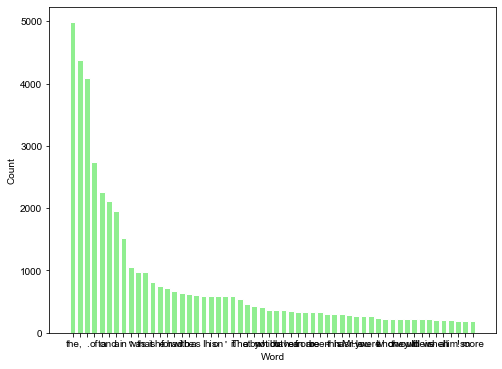

In [38]:
fig, ax = plt.subplots(figsize = (8,6))

sns.set(style = 'darkgrid')

plt.bar(value_count['target'][:56], value_count['value_count'][:56], color = 'lightgreen')
plt.xlabel('Word', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()


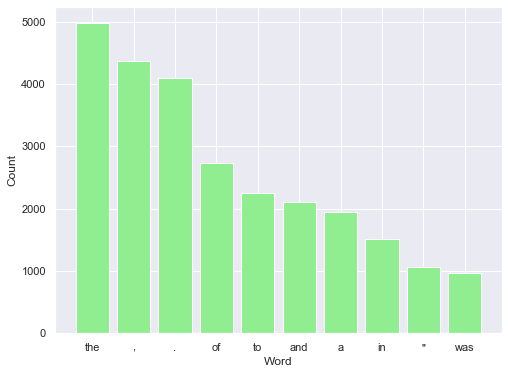

In [39]:
fig, ax = plt.subplots(figsize = (8,6))

sns.set(style = 'darkgrid')

plt.bar(value_count['target'][:10], value_count['value_count'][:10], color = 'lightgreen')
plt.xlabel('Word', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.savefig('train_top10.png', bbox_inches = 'tight')
